start opencv project 
session 1

In [4]:
import cv2
import matplotlib.pyplot as plt
# import normal
pic1 = cv2.imread('me.jpg')
# import gray scale
pic2 = cv2.imread('me.jpg', cv2.IMREAD_GRAYSCALE)
# import colord
pic3 = cv2.imread('me.jpg', cv2.IMREAD_COLOR)
# import not change
pic4 = cv2.imread('me.jpg', cv2.IMREAD_UNCHANGED)
# show pic < 1 name of window and 2 is pic

Text(0.5, 1.0, 'pic1')

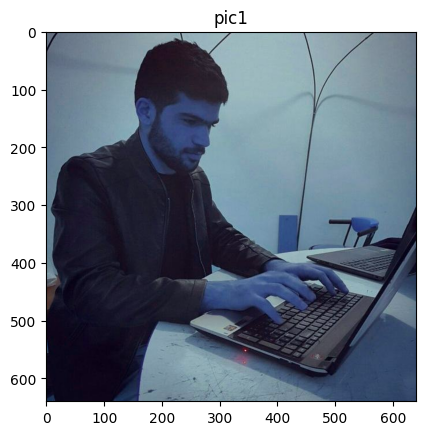

In [10]:
# window size do not change
# cv2.namedWindow('auto_win', cv2.WINDOW_AUTOSIZE)

# window size can be change
# cv2.namedWindow('normal', cv2.WINDOW_NORMAL)

# show image
# cv2.imshow('auto_win', pic1)
# cv2.imshow('normal', pic2)
# cv2.imshow('pic3', pic3)
# cv2.imshow('pic4', pic4)
plt.imshow(pic1)
plt.title('pic1')
# cv2.imwrite('gray2.png',pic2)
# to wait window
# cv2.waitKey(0)

change color of image to gray and hsv

In [11]:
hsv=cv2.cvtColor(pic1,cv2.COLOR_BGR2HSV)
gray=cv2.cvtColor(pic1,cv2.COLOR_BGR2GRAY)
cv2.imshow('hsv',hsv)
cv2.imshow('gray',gray)
cv2.waitKey(0)


-1

Getting edges
with bilateralFilter 

In [12]:
import cv2
pic1 = cv2.imread('1.jpg')
bilater=cv2.bilateralFilter(pic1,50,75,75)
cv2.imshow('bilatter',bilater)
cv2.imshow('pic1',pic1)
cv2.waitKey(0)

-1

Dilation

In [13]:
import numpy as np
kernel=np.ones((10,10),np.uint8)
dilation=cv2.dilate(bilater,kernel)
cv2.imshow('dilation',bilater)
cv2.imshow('pic1',pic1)
cv2.waitKey(0)

-1

Laplacian

In [14]:
laplacian=cv2.Laplacian(bilater,cv2.CV_64F)
cv2.imshow('Laplacian',laplacian)
cv2.imshow('pic1',pic1)
cv2.waitKey(0)

-1

Canny

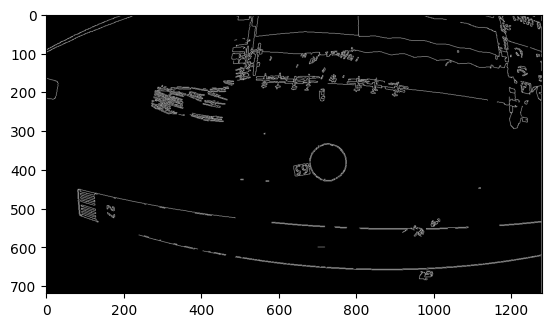

In [17]:
import matplotlib.pyplot as plt
canny=cv2.Canny(bilater,100,200)
# cv2.imshow('canny',canny)
# cv2.imshow('pic1',pic1)
# cv2.waitKey(0)
plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))

In [18]:
# Find contours based on Edges
cnts = cv2.findContours(canny.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]
cnts=sorted(cnts, key = cv2.contourArea, reverse = True)[:30] #sort contours based on their area keeping minimum required area as '30' (anything smaller than this will not be considered)
NumberPlateCnt = None #we currently have no Number plate contour

# loop over our contours to find the best possible approximate contour of number plate
count = 0
for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)
        if len(approx) == 4:  # Select the contour with 4 corners
            NumberPlateCnt = approx #This is our approx Number Plate Contour
            x,y,w,h = cv2.boundingRect(c)
            ROI = pic1[y:y+h, x:x+w]
            break

if NumberPlateCnt is not None:
    # Drawing the selected contour on the original image
    cv2.drawContours(pic1, [NumberPlateCnt], -1, (0,255,0), 3)

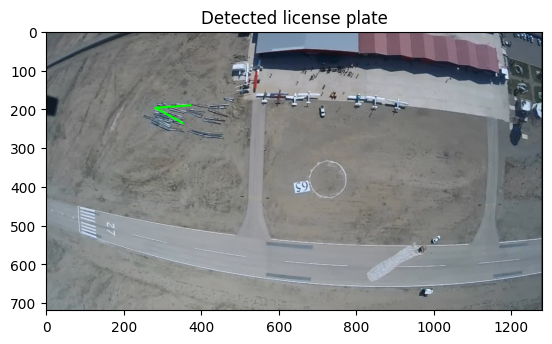

In [22]:
plt.imshow(cv2.cvtColor(pic1, cv2.COLOR_BGR2RGB))
plt.title("Detected license plate")
plt.show()

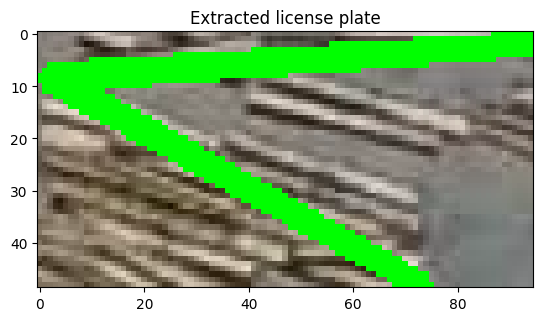

In [24]:
# Find bounding box and extract ROI
plt.imshow(ROI)
plt.title("Extracted license plate")
plt.show()

In [ ]:
# Distance between (x1, y1) and (x2, y2)
def dist(x1, x2, y1, y2):
    return ((x1-x2)**2+(y1-y2)**2)**0.5

In [25]:
idx=0
m=0
# To find the index of coordinate with maximum y-coordinate
for i in range(4):
    if NumberPlateCnt[i][0][1]>m:
        idx=i
        m=NumberPlateCnt[i][0][1]

# Assign index to the previous coordinate
if idx==0:
    pin=3
else:
    pin=idx-1

# Assign index to the next coordinate
if idx==3:
    nin=0
else:
    nin=idx+1

# Find distances between the acquired coordinate and its previous and next coordinate
p=dist(NumberPlateCnt[idx][0][0], NumberPlateCnt[pin][0][0], NumberPlateCnt[idx][0][1], NumberPlateCnt[pin][0][1])
n=dist(NumberPlateCnt[idx][0][0], NumberPlateCnt[nin][0][0], NumberPlateCnt[idx][0][1], NumberPlateCnt[nin][0][1])

# The coordinate that has more distance from the acquired coordinate is the required second bottom-most coordinate
if p>n:
    if NumberPlateCnt[pin][0][0]<NumberPlateCnt[idx][0][0]:
        left=pin
        right=idx
    else:
        left=idx
        right=pin
    d=p
else:
    if NumberPlateCnt[nin][0][0]<NumberPlateCnt[idx][0][0]:
        left=nin
        right=idx
    else:
        left=idx
        right=nin
    d=n
print(left, right)

NameError: name 'dist' is not defined

In [8]:
import cv2
import matplotlib.pyplot as plt

pic1 = cv2.imread('1.jpg')
bilater=cv2.bilateralFilter(pic1,50,75,75)
canny=cv2.Canny(bilater,100,200)
print(canny[0])
# cv2.mwrite(canny,'')
# plt.imshow(cv2.cvtColor(canny, cv2.COLOR_BGR2RGB))

[  0   0   0 ...   0 255   0]


get picture

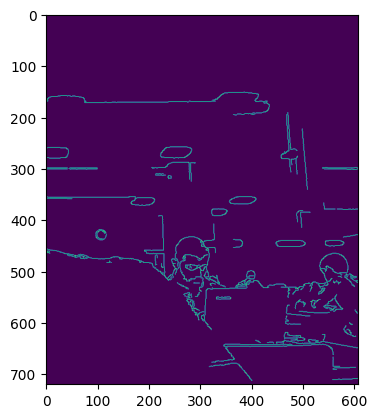

In [4]:
from ast import literal_eval
import numpy as np
import matplotlib.pyplot as plt
import cv2

s=(720,607)
pic=open('canny.txt','r')
test=np.zeros(s)
line=pic.readline()
line=literal_eval(line)
for i in line:
    tmp=i.split('.')
    test[int(tmp[0])][int(tmp[1])]=255

plt.imshow(test)